# Data Extraction

In [2]:
import pandas as pd

myvars = {}
with open("nihatoom-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()


import MySQLdb
conn = MySQLdb.connect(host = "localhost",user=myvars['DB username'], 
                       passwd=myvars['DB password'], db='I501Fa21grp05_db', local_infile = 1)
cursor = conn.cursor()

In [3]:
df = pd.read_sql('select MRJFLAG, CRKFLAG, METHAMFLAG,HEALTH,DIFFTHINK,IRMARITSTAT,MILFAMILY,WRKRSNJOB,IMOTHER,CIGFLAG,MJEVER,CRKEVER,MOVSINPYR2,DIFFWALK,IREDUHIGHST2,MILSPOUSE,WRKDPSTYR,IFATHER,CIGEVER,PNRNMFLAG,SEXATRACT,DIFFDRESS,WRKSTATWK2,IRWRKSTAT,POVERTY3,ALCFLAG,COCEVER,HEREVER,MILSTAT,DIFFHEAR,IRSEX,EDUENROLL,WRKHADJOB,EDFAM18,ALCEVER,ACTDEVER,DIFFSEE,COCFLAG,HERFLAG,SERVICE,SEXIDENT,DIFFERAND,HEALTH2,WRKDPSTWK, SEXAGE, SEXRACE,NEWRACE2 , INCOME, PDEN10 , COUTYP4, NOMARR2 from NSDUH_4;',conn)

In [4]:
df.head()

,MRJFLAG,CRKFLAG,METHAMFLAG,HEALTH,DIFFTHINK,IRMARITSTAT,MILFAMILY,WRKRSNJOB,IMOTHER,CIGFLAG,...,DIFFERAND,HEALTH2,WRKDPSTWK,SEXAGE,SEXRACE,NEWRACE2,INCOME,PDEN10,COUTYP4,NOMARR2
0,0,0,0,2,2,4,2,4,2,1,...,2,2,2,1,1,1,1,3,3,0
1,1,1,0,1,2,3,2,999,4,1,...,2,1,1,5,5,7,2,2,2,0
2,0,0,0,2,2,4,2,4,4,0,...,2,2,2,5,2,1,1,2,3,0
3,0,0,0,3,2,99,2,999,1,0,...,99,3,99,2,6,7,4,2,2,0
4,0,0,0,3,1,1,2,3,4,1,...,1,3,2,4,2,1,1,3,3,0


In [5]:
print(df.columns)

Index(['MRJFLAG', 'CRKFLAG', 'METHAMFLAG', 'HEALTH', 'DIFFTHINK',
       'IRMARITSTAT', 'MILFAMILY', 'WRKRSNJOB', 'IMOTHER', 'CIGFLAG', 'MJEVER',
       'CRKEVER', 'MOVSINPYR2', 'DIFFWALK', 'IREDUHIGHST2', 'MILSPOUSE',
       'WRKDPSTYR', 'IFATHER', 'CIGEVER', 'PNRNMFLAG', 'SEXATRACT',
       'DIFFDRESS', 'WRKSTATWK2', 'IRWRKSTAT', 'POVERTY3', 'ALCFLAG',
       'COCEVER', 'HEREVER', 'MILSTAT', 'DIFFHEAR', 'IRSEX', 'EDUENROLL',
       'WRKHADJOB', 'EDFAM18', 'ALCEVER', 'ACTDEVER', 'DIFFSEE', 'COCFLAG',
       'HERFLAG', 'SERVICE', 'SEXIDENT', 'DIFFERAND', 'HEALTH2', 'WRKDPSTWK',
       'SEXAGE', 'SEXRACE', 'NEWRACE2', 'INCOME', 'PDEN10', 'COUTYP4',
       'NOMARR2'],
      dtype='object')


In [6]:
#Recode drug usage flags to simplify

df['reg_drug_flag'] = (df['CIGFLAG']+df['ALCFLAG']+df['PNRNMFLAG'])/(df['CIGFLAG']+df['ALCFLAG']+df['PNRNMFLAG'])
df['hard_drug_flag'] = (df['MRJFLAG']+df['CRKFLAG']+df['METHAMFLAG']+ df['COCFLAG']+ df['HERFLAG'])/(df['MRJFLAG']+df['CRKFLAG']+df['METHAMFLAG']+ df['COCFLAG']+ df['HERFLAG'])

df['reg_drug_flag'].fillna(0,inplace=True)
df['hard_drug_flag'].fillna(0,inplace=True)

print(df['reg_drug_flag'].unique())
print(df['hard_drug_flag'].unique())

[1. 0.]
[0. 1.]


In [7]:
#Drop redundant columns

to_drop = ['MRJFLAG','CRKFLAG','METHAMFLAG','COCFLAG','HERFLAG','CIGFLAG','ALCFLAG','PNRNMFLAG','MJEVER','CRKEVER','ACTDEVER','CIGEVER','COCEVER','ALCEVER','HEREVER']
df.drop(columns=to_drop, inplace=True)

In [8]:
print(df.columns)

Index(['HEALTH', 'DIFFTHINK', 'IRMARITSTAT', 'MILFAMILY', 'WRKRSNJOB',
       'IMOTHER', 'MOVSINPYR2', 'DIFFWALK', 'IREDUHIGHST2', 'MILSPOUSE',
       'WRKDPSTYR', 'IFATHER', 'SEXATRACT', 'DIFFDRESS', 'WRKSTATWK2',
       'IRWRKSTAT', 'POVERTY3', 'MILSTAT', 'DIFFHEAR', 'IRSEX', 'EDUENROLL',
       'WRKHADJOB', 'EDFAM18', 'DIFFSEE', 'SERVICE', 'SEXIDENT', 'DIFFERAND',
       'HEALTH2', 'WRKDPSTWK', 'SEXAGE', 'SEXRACE', 'NEWRACE2', 'INCOME',
       'PDEN10', 'COUTYP4', 'NOMARR2', 'reg_drug_flag', 'hard_drug_flag'],
      dtype='object')


# Data Cleansing

In [9]:
# Here I'm defining a function to more easilly cleanse the data column by column.


#dframe - Data Frame name; column-Column to recode; 
#         bad_val- a list of values to recode; recode_val - value to replace with

def recodeColumn(dframe, column, bad_val, recode_val):
    dframe[column].replace(bad_val,recode_val,inplace=True)

recodeColumn(df, 'HEALTH',[98,94,97, 99,100], 0)

print(df['HEALTH'].unique())

[2 1 3 4 5 0]


In [10]:
recodeColumn(df, 'HEALTH',[98,94,97, 99,100], 0)
print(df['HEALTH'].unique())
#overall health
#1 = Excellent 
#2 = Very good
#3 = Good 
#4 = Fair
#5 = Poor 
#0-skip


[2 1 3 4 5 0]


In [61]:
recodeColumn(df, 'DIFFTHINK', [2,94,97,98,85], 0)
print(df['DIFFTHINK'].unique())
#Difficulty in thinking
#1-Yes, 2-No


[0 1]


In [12]:
recodeColumn(df, 'IRMARITSTAT', [4,99], 0)
print(df['IRMARITSTAT'].unique())
#MARITAL STATUS - IMPUTATION REVISED
#0-Never, 1-Married, 2-Widowed/Widowered, 3-Divorced/Separated,4-Never been married.

[0 3 1 2]


In [13]:
recodeColumn(df, 'MILFAMILY', [2,94,97,98,4], 0)
print(df['MILFAMILY'].unique())
#ANY IMMEDIATE FAMILY CURRENTLY IN US MILITARY
#1-YES,2-No

[0 1]


In [14]:
recodeColumn(df, 'WRKRSNJOB', [985,994,997,998,999], 0)
print(df['WRKRSNJOB'].unique())

#REASON FOR NOT HAVING A JOB - PAST WK
#0-SKIP,

#985 = BAD DATA Logically assigned.
#994 = DON'T KNOW 
#997 = REFUSED 
#998 = BLANK (NO ANSWER)
#999 = LEGITIMATE SKIP
# The above were recoded to 0

#1 = Looking for work 
#2 = On layoff and not looking for work 
#3 = Keeping house or caring for children full time 
#4 = Going to school/training 
#5 = Retired
#6 = Disabled for work
#7 = Didn't want a job
#8 = Some other reason.



[4 0 3 8 1 5 6 7 2]


In [15]:
recodeColumn(df, 'IMOTHER', [3,94,97,98,4], 0)
print(df['IMOTHER'].unique())

#
#2,3,4?
#0-No, 1-Yes

[2 0 1]


In [16]:
print(df['IMOTHER'].unique())
 
# no need to recode the data
#RC-MOTHER IN HH
#1 = R is 12-17, mother in hh 
#2 = R is 12-17, no mother in hh
#3 = R is 12-17, don't know whether mother is in hh
#4 = R is 18 or older .


[2 0 1]


In [17]:
recodeColumn(df, 'MOVSINPYR2', [0], 4)
print(df['MOVSINPYR2'].unique())

# Recoded 0 to 4 , as we used 0 for skip (to generalize)


[  4   1 994 997   2   3 998 985]


In [18]:
recodeColumn(df, 'MOVSINPYR2', [994,997,998,995,985], 0)
print(df['MOVSINPYR2'].unique())
#MOVSINPYR2-TIMES MOVED PAST 12 MONTHS- RECODED
#1 = One time
#2 = Two times
#3 = Three or more times 



[4 1 0 2 3]


In [19]:
recodeColumn(df, 'DIFFWALK', [94,97,98,85], 0)
print(df['DIFFWALK'].unique())
#DIFFWALK-Diffculty in walking
#0- skip 
#1-yes 
#2- no

[2 1 0]


In [20]:

print(df['IREDUHIGHST2'].unique())
#EDUCATION - RECODED IMPUTATION REVISED
#1 = Fifth grade or less grade completed 
#2 = Sixth grade completed 
#3 = Seventh grade completed 
#4 = Eighth grade completed 
#5 = Ninth grade completed
#6 = Tenth grade completed 
#7 = Eleventh or Twelfth grade completed, no diploma
#8 = High school diploma/GED
#9 = Some college credit, but no degree
#10 = Associate's degree (for example, AA, AS)
#11 = College graduate or higher
# no need to recode

[ 7  8 11  4  9  5  3  1  6 10  2]


In [21]:
recodeColumn(df, 'MILSPOUSE', [2,94,97,98,99], 0)
print(df['MILSPOUSE'].unique())


#SPOUSE OR PARTNER IN MILITARY
#1-YES,2-NO
#as the values are not aligned with the codebook values - MILTSPPAR'

[0 1]


In [22]:
print(df['MILSPOUSE'].unique())

[0 1]


In [23]:
recodeColumn(df, 'WRKDPSTYR', [94,97,98,99,85], 0)
print(df['WRKDPSTYR'].unique())

#PAST 12 MOS, WORKED AT ANY JOB
#1-Yes, 2-No

#85 = BAD DATA Logically assigned.
#94 = DON'T KNOW 
#97 = REFUSED 
#98 = BLANK (NO ANSWER)
#99 = LEGITIMATE SKIP
# The above were recoded to 0

[1 0 2]


In [24]:
recodeColumn(df, 'IFATHER', [2,3,94,97,98,4], 0)
print(df['IFATHER'].unique())

#RC-MOTHER IN HH
#1 = R is 12-17, father in hh 
#2 = R is 12-17, no father in hh 
#3 = R is 12-17, don't know whether father is in hh
#4 = R is 18 or older


[0 1]


In [25]:
recodeColumn(df, 'SEXATRACT', [94,97,98,99,89,85], 0)
print(df['SEXATRACT'].unique())

#SEXUAL ATTRACTION
#1 = I am only attracted to opposite sex 
#2 = I am mostly attracted to opposite sex
#3 = I am equally attracted to males and females
#4 = I am mostly attracted to same sex
#5 = I am only attracted to same sex 
#6 = I am not sure



#85 = BAD DATA Logically assigned.
#89 =LEGITIMATE SKIP Logically assigned
#94 = DON'T KNOW 
#97 = REFUSED 
#98 = BLANK (NO ANSWER)
#99 = LEGITIMATE SKIP
# The above were recoded to 0

#0- skip

[0 1 2 6 5 3 4]


In [26]:
recodeColumn(df, 'DIFFDRESS', [97, 94, 98, 85], 0)
print(df['DIFFDRESS'].unique())

#DIFFICULTY IN DRESSING
#85 = BAD DATA Logically assigned.
#94 = DON'T KNOW 
#97 = REFUSED 
#98 = BLANK (NO ANSWER)
#99 = LEGITIMATE SKIP
# The above were recoded to 0

#1-yes, 2-no

[2 1 0]


In [27]:
recodeColumn(df, 'WRKSTATWK2', [99,98], 0)
print(df['WRKSTATWK2'].unique())

#WORK SITUATION IN PAST WEEK - RECODE
#98 = BLANK (NO ANSWER)
#99 = LEGITIMATE SKIP
# The above were recoded to 0

#1 = Worked at full-time job, past week
#2 = Worked at part time job, past week
#3 = Has job or volunteer worker, did not work past wk.
#4 = Unemployed/on layoff, looking for work 
#5 = Disabled 
#6 = Keeping house full-time 
#7 = In school/training 
#8 = Retired
#9 = Does not have a job, some other reason



[7 1 0 6 9 2 4 8 5 3]


In [28]:
recodeColumn(df, 'IRWRKSTAT', [99], 0)
print(df['IRWRKSTAT'].unique())
#EMPLOYMENT STATUS 
#1 = Employed full time
#2 = Employed part time 
#3 = Unemployed 
#99 = recoded to 0- skip 


[4 1 0 2 3]


In [29]:
print(df['POVERTY3'].unique())


#POVERTY LEVEL (% OF US CENSUS POVERTY THRESHOLD)
# 1 = Living in Poverty 
#2 = Income Up to 2X Fed Pov Thresh 
#3 = Income More Than 2X Fed Pov Thresh 


[1 2 3 0]


In [30]:
print(df['POVERTY3'].unique())


[1 2 3 0]


In [31]:
recodeColumn(df, 'MILSTAT', [94,97,98,99,85], 0)
print(df['MILSTAT'].unique())

#CURRENT  MILITARY STATUS
#85 = BAD DATA Logically assigned.
#94 = DON'T KNOW 
#97 = REFUSED 
#98 = BLANK (NO ANSWER)
#99 = LEGITIMATE SKIP
# The above were recoded to 0

#2 = In a reserves component
#3 = Now separated/retired from reserves/active duty


[0 3 2]


In [32]:
recodeColumn(df, 'DIFFHEAR', [94,97,98,85], 0)
print(df['DIFFHEAR'].unique())
#DIFFCULTY IN HEARING
#1-Yes ,2-No,

[2 1 0]


In [33]:

print(df['IRSEX'].unique())

#IMPUTATION REVISED GENDER
#no need to recode 
#1-M, 2-F 

[1 2]


In [34]:
recodeColumn(df, 'EDUENROLL', [97,94,94,98], 0)
print(df['EDUENROLL'].unique())
 

[ 1  2  0 11]


In [35]:
recodeColumn(df, 'WRKHADJOB', [94,97,98,85,99,4], 0)
print(df['WRKHADJOB'].unique())
#DID YOU HAVE A JOB OR BUSINESS
#0-skip, 
#1-Yes
#2-no

[2 0 1]


In [36]:
recodeColumn(df, 'EDFAM18', [0], 2)
recodeColumn(df, 'EDFAM18', [98], 0)
print(df['EDFAM18'].unique())

#EDITED INDICATOR: FAMILY IN HH 18 OR OLDER
#98 recoded to 0
#2 = R has other family members >=18
#1 = R does not have other family members >=18 .


[1 2 0]


In [37]:
recodeColumn(df, 'DIFFSEE', [94,97,98,85], 0)
print(df['DIFFSEE'].unique())

#Diffculty in Seeing
#No-2, 1-Yes, 
#0 - skip 

[2 1 0]


In [38]:
recodeColumn(df, 'SERVICE', [ 99,94,97,98,85,89], 0)
print(df['SERVICE'].unique())
#EVER BEEN IN THE US ARMED FORCES
#2- NO, 1-Yes

[2 0 1]


In [39]:
recodeColumn(df, 'SEXIDENT', [89,85,94,97,98,99], 0)
print(df['SEXIDENT'].unique())

#SEXUAL IDENTITY
#0-skip
#1 = Heterosexual, that is, straight................................................................................... 157171 16.56
#2 = Lesbian or Gay........................................................................................................ 3664 0.39
#3 = Bisexual



[0 1 2 3]


In [40]:
recodeColumn(df, 'DIFFERAND', [85,94,97,98,99], 0)
print(df['DIFFERAND'].unique())

#DIFFICULTY DOING ERRANDS ALONE
#0-skip, 
#1-Yes
#2- NO

[2 0 1]


In [41]:
print(df['COUTYP4'].unique())

#no need to recode 


#COUNTY METRO/NONMETRO STATUS (2013 3-LEVEL)
#1 = Large Metro
#2 = Small Metro
#3 = Nonmetro 


[3 2 1]


In [42]:
print(df['SEXAGE'].unique())


# no need to change

#-COMBINED GENDER BY AGE CATEGORY INDICATOR
#1 = Males Aged 12-17 (IRSEX=1 and CATAGE=1)
#2 = Females Aged 12-17 (IRSEX=2 and CATAGE=1) 
#3 = Males Aged 18-25 (IRSEX=1 and CATAGE=2).
#4 = Females Aged 18-25 (IRSEX=2 and CATAGE=2) 
#5 = Otherwise 


[1 5 2 4 3]


In [43]:

print(df['SEXRACE'].unique())

#no need to change
#COMBINED GENDER BY RACE INDICATOR
#1 = Male, White, Not Hisp (IRSEX=1 and NEWRACE2=1) 
#2 = Female, White, Not Hisp (IRSEX=2 and NEWRACE2=1)
#3 = Male, Black, Not Hisp (IRSEX=1 and NEWRACE2=2)
#4 = Female, Black, Not Hisp (IRSEX=2 and NEWRACE2=2) 
#5 = Male, Hispanic (IRSEX=1 )



[1 5 2 6 7 4 3]


In [44]:

print(df['INCOME'].unique())

#no need to change
##TOTAL FAMILY INCOME RECODE
#1 = Less than $20,000 
#2 = $20,000 - $49,999 
#3 = $50,000 - $74,999 
#4 = $75,000 or More

[1 2 4 3]


In [45]:

print(df['NEWRACE2'].unique())


#no need to change
#RC-RACE/HISPANICITY RECODE (7 LEVELS)
#1 = NonHisp White 
#2 = NonHisp Black/Afr Am
#3 = NonHisp Native Am/AK Native
#4 = NonHisp Native HI/Other Pac Isl
#5 = NonHisp Asian
#6 = NonHisp more than one race
#7 = Hispanic 


[1 7 5 2 4 3 6]


In [46]:
recodeColumn(df, 'NOMARR2', [94,97,98,99], 0)
print(df['NOMARR2'].unique())

#NUMBER OF TIMES MARRIED
#1 = One time
#2 = Two or more times 
#94 = DON'T KNOW 
#97 = REFUSED 
#98 = BLANK (NO ANSWER)
#99 = LEGITIMATE SKIP ..
#0 = skip

[0 1 2]


In [47]:
print(df['PDEN10'].unique())


#POPULATION DENSITY 2010 - THREE LEVELS
#1 = Segment in a CBSA with 1 million or more persons
#2 = Segm. in a CBSA with fewer than 1 million persons 
#3 = Segment not in a CBSA.


[3 2 1]


In [48]:
df

,HEALTH,DIFFTHINK,IRMARITSTAT,MILFAMILY,WRKRSNJOB,IMOTHER,MOVSINPYR2,DIFFWALK,IREDUHIGHST2,MILSPOUSE,...,WRKDPSTWK,SEXAGE,SEXRACE,NEWRACE2,INCOME,PDEN10,COUTYP4,NOMARR2,reg_drug_flag,hard_drug_flag
0,2,0,0,0,4,2,4,2,7,0,...,2,1,1,1,1,3,3,0,1.0,0.0
1,1,0,3,0,0,0,4,2,8,0,...,1,5,5,7,2,2,2,0,1.0,1.0
2,2,0,0,0,4,0,4,1,11,0,...,2,5,2,1,1,2,3,0,1.0,0.0
3,3,0,0,0,0,1,4,2,4,0,...,99,2,6,7,4,2,2,0,1.0,0.0
4,3,1,1,0,3,0,1,2,9,0,...,2,4,2,1,1,3,3,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282763,2,0,0,0,0,0,1,2,9,0,...,1,4,6,7,2,3,3,0,1.0,1.0
282764,2,0,0,0,0,0,4,2,11,0,...,1,5,7,5,2,2,2,1,1.0,1.0
282765,2,0,0,0,0,1,4,2,4,0,...,99,1,1,1,4,1,1,0,0.0,0.0
282766,2,1,0,0,1,1,4,2,11,0,...,2,2,6,7,2,1,1,0,1.0,1.0


In [49]:
df.to_csv('Recoded regular and hard drug.csv', encoding='utf-8')

# exploratory data analysis

In [50]:
df.apply(pd.value_counts)

,HEALTH,DIFFTHINK,IRMARITSTAT,MILFAMILY,WRKRSNJOB,IMOTHER,MOVSINPYR2,DIFFWALK,IREDUHIGHST2,MILSPOUSE,...,WRKDPSTWK,SEXAGE,SEXRACE,NEWRACE2,INCOME,PDEN10,COUTYP4,NOMARR2,reg_drug_flag,hard_drug_flag
0.0,55.0,253403.0,258158.0,277829.0,193291.0,214560.0,5961.0,1295.0,NaN,282375.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189431.0,71054.0,160275.0
1.0,72117.0,29365.0,18062.0,4939.0,17591.0,62273.0,51587.0,13349.0,5564.0,393.0,...,140446.0,34888.0,79169.0,164896.0,53844.0,120383.0,127562.0,73319.0,211714.0,122493.0
2.0,108600.0,NaN,1692.0,NaN,2533.0,5935.0,20440.0,268124.0,11477.0,NaN,...,106114.0,33375.0,85727.0,36098.0,86247.0,139595.0,99502.0,20018.0,NaN,NaN
3.0,74590.0,NaN,4856.0,NaN,9972.0,NaN,10494.0,NaN,11993.0,NaN,...,NaN,33739.0,16419.0,4115.0,43820.0,22790.0,55704.0,NaN,NaN,NaN
4.0,23300.0,NaN,NaN,NaN,17813.0,NaN,194286.0,NaN,13927.0,NaN,...,271.0,36177.0,19679.0,1434.0,98857.0,NaN,NaN,NaN,NaN,NaN
5.0,4106.0,NaN,NaN,NaN,15549.0,NaN,NaN,NaN,15477.0,NaN,...,NaN,144589.0,24881.0,12976.0,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,7959.0,NaN,NaN,NaN,15664.0,NaN,...,NaN,NaN,27514.0,10854.0,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,5469.0,NaN,NaN,NaN,21283.0,NaN,...,NaN,NaN,29379.0,52395.0,NaN,NaN,NaN,NaN,NaN,NaN
8.0,NaN,NaN,NaN,NaN,12591.0,NaN,NaN,NaN,57686.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52208.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df.apply(pd.value_counts)

,HEALTH,DIFFTHINK,IRMARITSTAT,MILFAMILY,WRKRSNJOB,IMOTHER,MOVSINPYR2,DIFFWALK,IREDUHIGHST2,MILSPOUSE,...,WRKDPSTWK,SEXAGE,SEXRACE,NEWRACE2,INCOME,PDEN10,COUTYP4,NOMARR2,reg_drug_flag,hard_drug_flag
0.0,55.0,253403.0,258158.0,277829.0,193291.0,214560.0,5961.0,1295.0,NaN,282375.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189431.0,71054.0,160275.0
1.0,72117.0,29365.0,18062.0,4939.0,17591.0,62273.0,51587.0,13349.0,5564.0,393.0,...,140446.0,34888.0,79169.0,164896.0,53844.0,120383.0,127562.0,73319.0,211714.0,122493.0
2.0,108600.0,NaN,1692.0,NaN,2533.0,5935.0,20440.0,268124.0,11477.0,NaN,...,106114.0,33375.0,85727.0,36098.0,86247.0,139595.0,99502.0,20018.0,NaN,NaN
3.0,74590.0,NaN,4856.0,NaN,9972.0,NaN,10494.0,NaN,11993.0,NaN,...,NaN,33739.0,16419.0,4115.0,43820.0,22790.0,55704.0,NaN,NaN,NaN
4.0,23300.0,NaN,NaN,NaN,17813.0,NaN,194286.0,NaN,13927.0,NaN,...,271.0,36177.0,19679.0,1434.0,98857.0,NaN,NaN,NaN,NaN,NaN
5.0,4106.0,NaN,NaN,NaN,15549.0,NaN,NaN,NaN,15477.0,NaN,...,NaN,144589.0,24881.0,12976.0,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,7959.0,NaN,NaN,NaN,15664.0,NaN,...,NaN,NaN,27514.0,10854.0,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,5469.0,NaN,NaN,NaN,21283.0,NaN,...,NaN,NaN,29379.0,52395.0,NaN,NaN,NaN,NaN,NaN,NaN
8.0,NaN,NaN,NaN,NaN,12591.0,NaN,NaN,NaN,57686.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52208.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
for i in df.columns:
    x = df[i].value_counts().to_frame()
    print("Column name :",i,"\n count of code values:\n",x)

Column name : HEALTH 
 count of code values:
    HEALTH
2  108600
3   74590
1   72117
4   23300
5    4106
0      55
Column name : DIFFTHINK 
 count of code values:
    DIFFTHINK
0     253403
1      29365
Column name : IRMARITSTAT 
 count of code values:
    IRMARITSTAT
0       258158
1        18062
3         4856
2         1692
Column name : MILFAMILY 
 count of code values:
    MILFAMILY
0     277829
1       4939
Column name : WRKRSNJOB 
 count of code values:
    WRKRSNJOB
0     193291
4      17813
1      17591
5      15549
8      12591
3       9972
6       7959
7       5469
2       2533
Column name : IMOTHER 
 count of code values:
    IMOTHER
0   214560
1    62273
2     5935
Column name : MOVSINPYR2 
 count of code values:
    MOVSINPYR2
4      194286
1       51587
2       20440
3       10494
0        5961
Column name : DIFFWALK 
 count of code values:
    DIFFWALK
2    268124
1     13349
0      1295
Column name : IREDUHIGHST2 
 count of code values:
     IREDUHIGHST2
8          57

<AxesSubplot:xlabel='SERVICE', ylabel='count'>

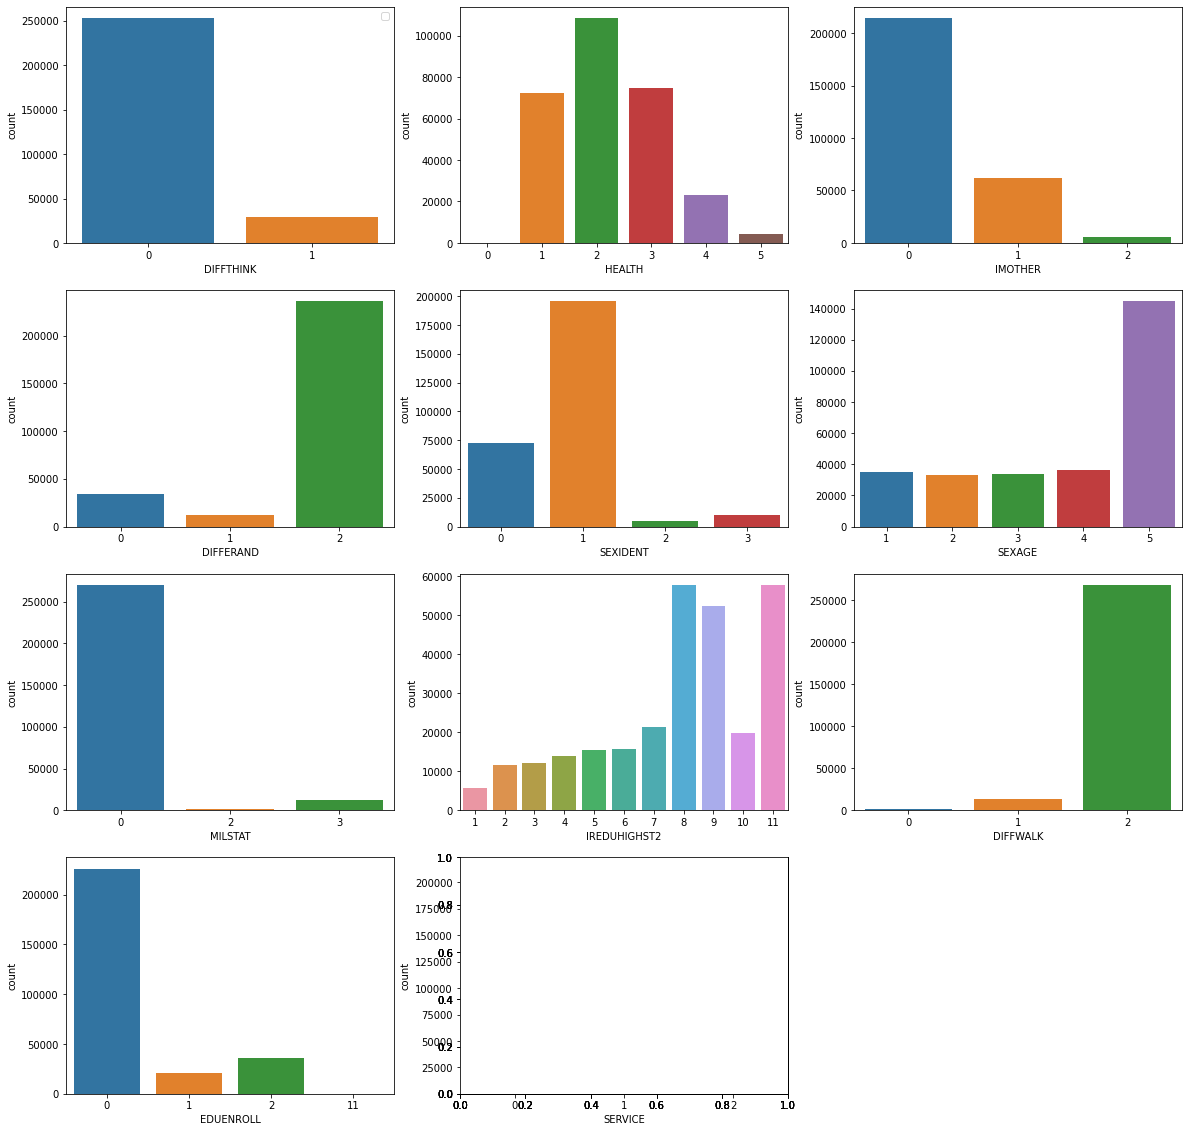

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (20,20))

ax1 = fig.add_subplot(4,3,1)
#handles, labels = ax1.get_legend_handles_labels()
handles = ["0","1"]
labels = ["no difficulty in thinking", "diffculty in thinking",]
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)
sns.countplot(data = df, x = 'DIFFTHINK', ax=ax1).legend(handles, labels)


ax2 = fig.add_subplot(4,3,2)
sns.countplot(data = df, x = 'HEALTH', ax=ax2)

ax3 = fig.add_subplot(4,3,3)
sns.countplot(data = df, x = 'IMOTHER', ax=ax3)

ax4 = fig.add_subplot(4,3,4)
sns.countplot(data = df, x = 'DIFFERAND', ax=ax4)



ax5 = fig.add_subplot(4,3,5)
sns.countplot(data = df, x = 'SEXIDENT', ax=ax5)


ax6 = fig.add_subplot(4,3,6)
sns.countplot(data = df, x = 'SEXAGE', ax=ax6)


ax7 = fig.add_subplot(4,3,7)
sns.countplot(data = df, x = 'MILSTAT', ax=ax7)


ax8 = fig.add_subplot(4,3,8)
sns.countplot(data = df, x = 'IREDUHIGHST2', ax=ax8)
#sns.violinplot(data = ds_cat, x = 'LotConfig', y = 'SalePrice', ax=ax6)
#sns.swarmplot(data = ds_cat, x = 'LotConfig', y='SalePrice', colo

ax9 = fig.add_subplot(4,3,9)
sns.countplot(data = df, x = 'DIFFWALK', ax=ax9)

#hard drugs

ax10 = fig.add_subplot(4,3,10)
sns.countplot(data = df, x = 'EDUENROLL', ax=ax10)

ax11 = fig.add_subplot(4,3,11)
sns.countplot(data = df, x = 'SERVICE', ax=ax11)

ax12 = fig.add_subplot(4,3,11)
sns.countplot(data = df, x = 'SERVICE', ax=ax11)


ax13 = fig.add_subplot(4,3,11)
sns.countplot(data = df, x = 'SERVICE', ax=ax11)

ax14 = fig.add_subplot(4,3,11)
sns.countplot(data = df, x = 'SERVICE', ax=ax11)

ax15 = fig.add_subplot(4,3,11)
sns.countplot(data = df, x = 'SERVICE', ax=ax11)

ax16 = fig.add_subplot(4,3,11)
sns.countplot(data = df, x = 'SERVICE', ax=ax11)


<AxesSubplot:xlabel='SERVICE', ylabel='count'>

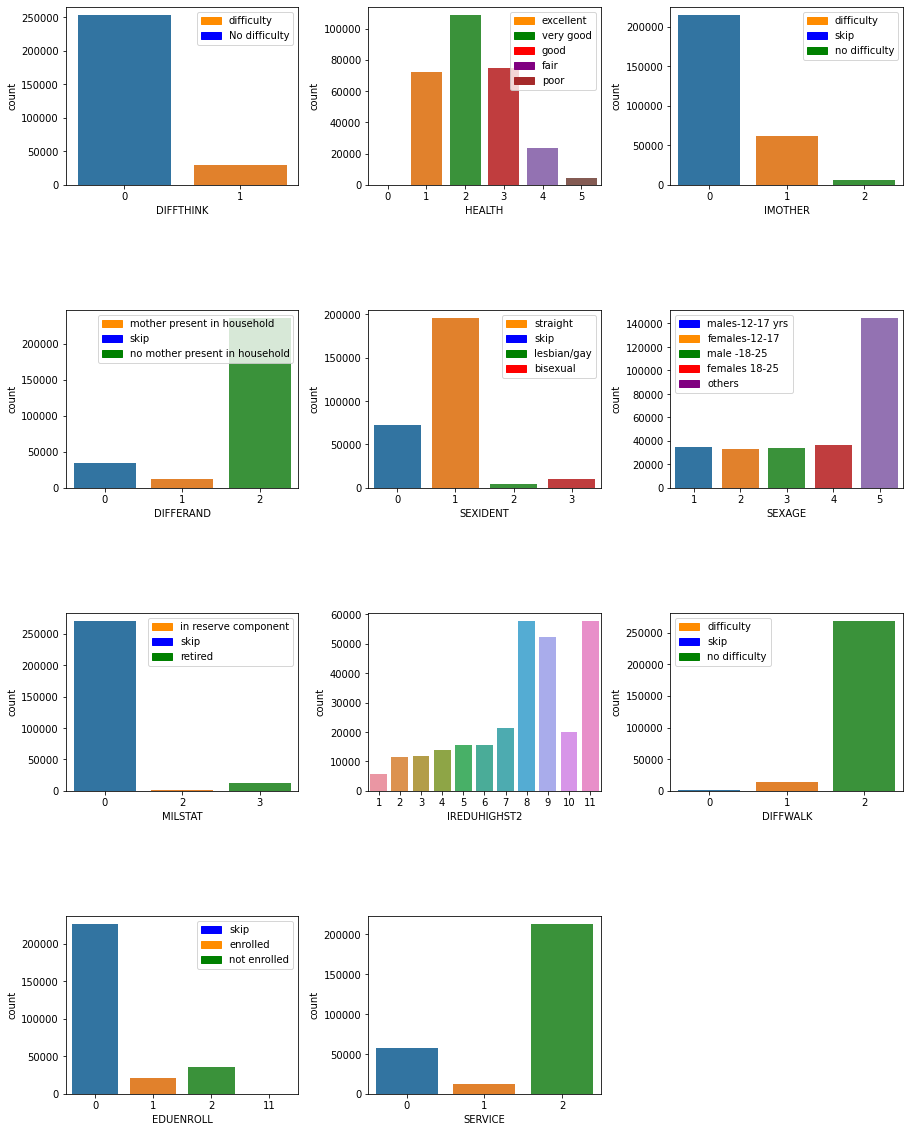

In [60]:
import seaborn as sns 
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (15,20))

ax1 = fig.add_subplot(4,3,1)

sns.countplot(data = df, x = 'DIFFTHINK', ax=ax1).legend(handles, labels)
colors = {'difficulty':'darkorange', 'No difficulty':'blue' }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

ax2 = fig.add_subplot(4,3,2)
sns.countplot(data = df, x = 'HEALTH', ax=ax2)
colors = {'excellent':'darkorange', 'very good':'green', 'good': 'red',  'fair' :'purple','poor' :'brown'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


ax3 = fig.add_subplot(4,3,3)
sns.countplot(data = df, x = 'IMOTHER', ax=ax3)
colors = {'difficulty':'darkorange', 'skip':'blue' ,'no difficulty':"green" }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


ax4 = fig.add_subplot(4,3,4)
sns.countplot(data = df, x = 'DIFFERAND', ax=ax4)
colors = {'mother present in household':'darkorange', 'skip':'blue' ,'no mother present in household':"green" }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)



ax5 = fig.add_subplot(4,3,5)
sns.countplot(data = df, x = 'SEXIDENT', ax=ax5)
colors = {'straight':'darkorange','' 'skip':'blue' , 'lesbian/gay':"green", 'bisexual':"red"}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


ax6 = fig.add_subplot(4,3,6)
sns.countplot(data = df, x = 'SEXAGE', ax=ax6)
colors = { 'males-12-17 yrs':'blue' , 'females-12-17':'darkorange','male -18-25':"green", 'females 18-25':"red" , 'others':"purple" }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


ax7 = fig.add_subplot(4,3,7)
sns.countplot(data = df, x = 'MILSTAT', ax=ax7)
colors = {'in reserve component':'darkorange', 'skip':'blue','retired' :"green" }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)



ax8 = fig.add_subplot(4,3,8)
sns.countplot(data = df, x = 'IREDUHIGHST2', ax=ax8)


ax9 = fig.add_subplot(4,3,9)
sns.countplot(data = df, x = 'DIFFWALK', ax=ax9)
colors = {'difficulty':'darkorange', 'skip':'blue',"no difficulty":"green" }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

#hard drugs

ax10 = fig.add_subplot(4,3,10)
sns.countplot(data = df, x = 'EDUENROLL', ax=ax10)
colors = {'skip':'blue','enrolled':'darkorange','not enrolled' :"green" }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

ax11 = fig.add_subplot(4,3,11)
sns.countplot(data = df, x = 'SERVICE', ax=ax11)

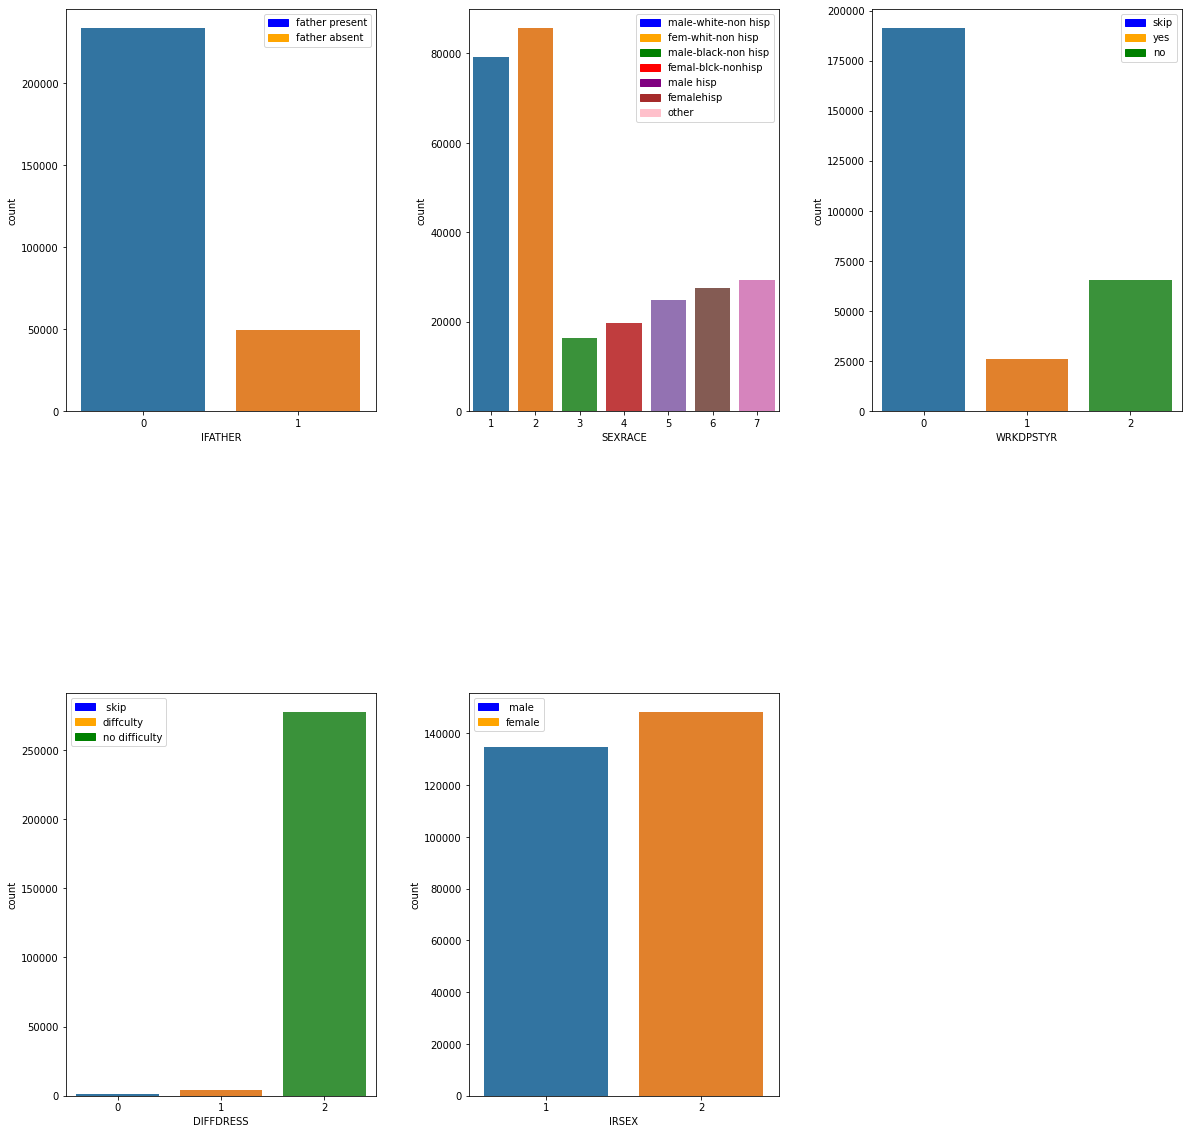

In [62]:
fig = plt.figure(figsize = (20,20))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = df, x = 'IFATHER', ax=ax1)
colors = { 'father present':'blue','father absent': 'orange' }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = df, x = 'SEXRACE', ax=ax2)
colors = {'male-white-non hisp':'blue', 'fem-whit-non hisp':'orange','male-black-non hisp': 'green', 'femal-blck-nonhisp': 'red' ,'male hisp' :'purple', 'femalehisp' :'brown', 'other':'pink'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = df, x = 'WRKDPSTYR', ax=ax3)
colors = {'skip':'blue', 'yes':'orange','no': 'green' }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

ax4 = fig.add_subplot(2,3,4)
sns.countplot(data = df, x = 'DIFFDRESS', ax=ax4)
colors = {' skip':'blue', 'diffculty':'orange','no difficulty': 'green' }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

ax5 = fig.add_subplot(2,3,5)
sns.countplot(data = df, x = 'IRSEX', ax=ax5)
colors = {' male':'blue', 'female':'orange' }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

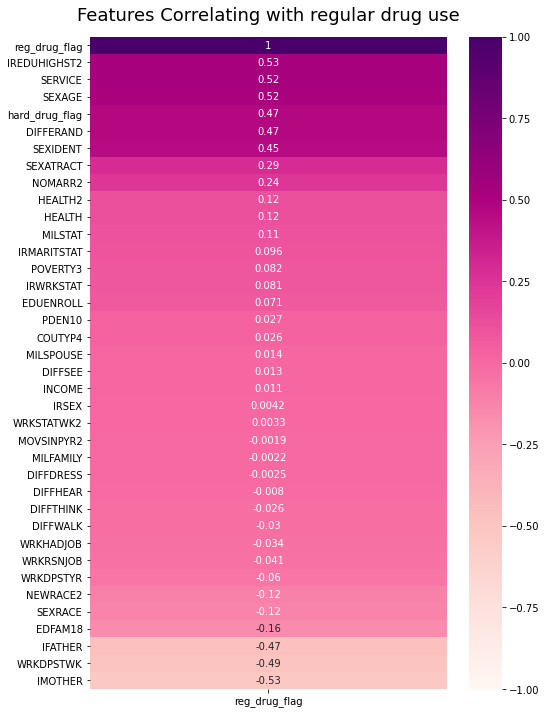

In [55]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['reg_drug_flag']].sort_values(by='reg_drug_flag', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdPu')
heatmap.set_title('Features Correlating with regular drug use', fontdict={'fontsize':18}, pad=16);


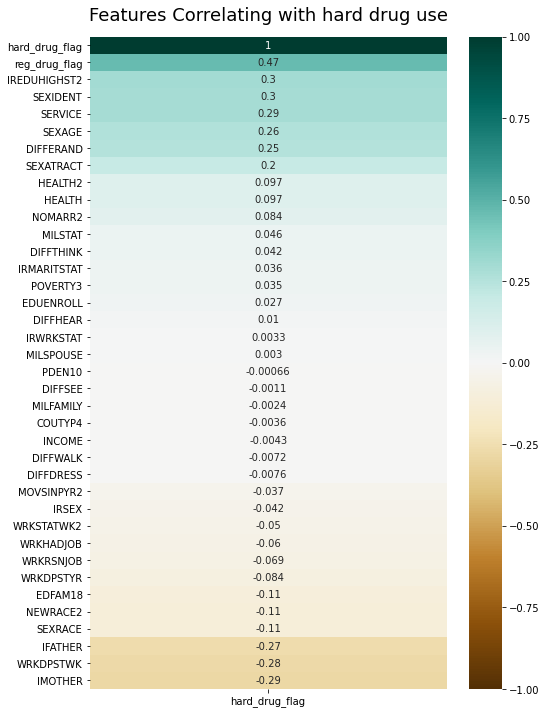

In [56]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['hard_drug_flag']].sort_values(by='hard_drug_flag', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with hard drug use', fontdict={'fontsize':18}, pad=16);


In [57]:
# Function for easily plotting sns barplots on a grid
def plot_bar(data, grid, x, y, xlabel, ylabel, title, xticklabels, rotation=0):
    ax = fig.add_subplot(grid[0], grid[1], grid[2])
    sns.barplot(data=data, x=x, y=y, 
    estimator=(lambda x: sum(x)/len(x)), ax=ax).set_title(title)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.set_xticklabels(xticklabels, rotation=rotation)

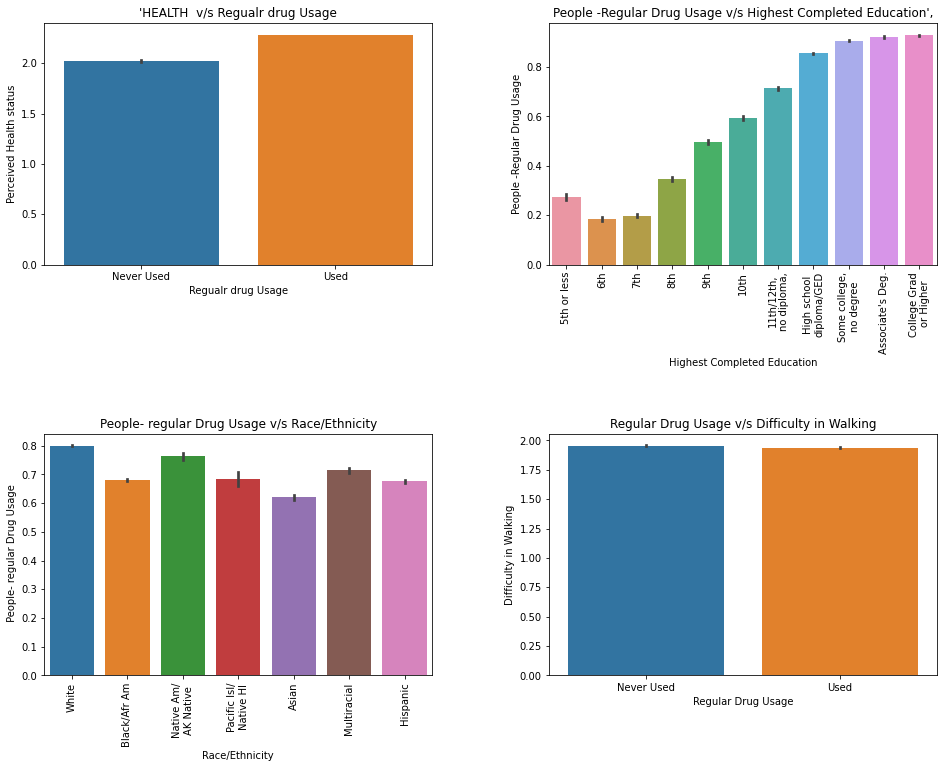

In [58]:
# Set figure parameters
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.subplot.wspace'] = 0.3
plt.rcParams['figure.subplot.hspace'] = 0.7
fig = plt.figure()

# Call plot_bar to plot bar graphs for various variables
plot_bar(df,[2, 2, 1], 'reg_drug_flag', 'HEALTH', 'Regualr drug Usage', 'Perceived Health status', 
"'HEALTH  v/s Regualr drug Usage", ["Never Used", "Used"])

plot_bar(df,[2, 2, 2], 'IREDUHIGHST2', 'reg_drug_flag', 'Highest Completed Education', 'People -Regular Drug Usage', 
"People -Regular Drug Usage v/s Highest Completed Education',",
["5th or less", "6th", "7th", "8th", "9th", "10th", "11th/12th,\nno diploma,", 
"High school\ndiploma/GED", "Some college,\nno degree", "Associate's Deg.", "College Grad\nor Higher"], 90)

plot_bar(df,[2, 2, 3], 'NEWRACE2', 'reg_drug_flag', 'Race/Ethnicity', ' People- regular Drug Usage', 
"People- regular Drug Usage v/s Race/Ethnicity", 
["White", "Black/Afr Am", "Native Am/\nAK Native", "Pacific Isl/\nNative HI", "Asian", "Multiracial", "Hispanic"], 90)

plot_bar(df,[2, 2, 4], 'reg_drug_flag', 'DIFFWALK', 'Regular Drug Usage', 'Difficulty in Walking', 
"Regular Drug Usage v/s Difficulty in Walking", ["Never Used", "Used"])